In [1]:
import pandas as pd
import sys
from pathlib import Path
from plotnine import *

sys.path.insert(0, str(Path.cwd()))
from analysis import read_benchmarks

In [2]:
# Load benchmark data
dfr = read_benchmarks()
print(f"Loaded {len(dfr)} benchmark results")
dfr.head()

Loaded 590 benchmark results


,date,version,commit_id,filename,runtime,cpu,origin,group,experiment,sampleSize,category,n_samples,min_ns,max_ns,avg_ns,p75_ns,p99_ns,p995_ns,p999_ns
0,2025-12-01 21:07:23+00:00,0.0.27,3fefabe36378b072ddbc17bb6b85bbd0dee4bc2e,bench_2025-12-01T21:07:23+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/acces...,None,Triples FirstObject,5000,"NodeIDTypeQS, high uniqueness",17,383541.0,1449666.0,711682.0,937042.0,1449666.0,1449666.0,1449666.0
1,2025-12-01 21:07:23+00:00,0.0.27,3fefabe36378b072ddbc17bb6b85bbd0dee4bc2e,bench_2025-12-01T21:07:23+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/acces...,None,Triples FirstObject,10000,"NodeIDTypeQS, high uniqueness",14,873853.0,2931703.0,1884626.0,2452050.0,2931703.0,2931703.0,2931703.0
2,2025-12-01 21:07:23+00:00,0.0.27,3fefabe36378b072ddbc17bb6b85bbd0dee4bc2e,bench_2025-12-01T21:07:23+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/acces...,None,Triples FirstObject,15000,"NodeIDTypeQS, high uniqueness",13,1386728.0,10612005.0,5176620.0,7561448.0,10612005.0,10612005.0,10612005.0
3,2025-12-01 21:07:23+00:00,0.0.27,3fefabe36378b072ddbc17bb6b85bbd0dee4bc2e,bench_2025-12-01T21:07:23+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/acces...,None,Triples FirstObject,20000,"NodeIDTypeQS, high uniqueness",12,1952081.0,8531973.0,3783098.0,4186703.0,8531973.0,8531973.0,8531973.0
4,2025-12-01 21:07:23+00:00,0.0.27,3fefabe36378b072ddbc17bb6b85bbd0dee4bc2e,bench_2025-12-01T21:07:23+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/acces...,None,Triples FirstObject,25000,"NodeIDTypeQS, high uniqueness",12,2730174.0,5181033.0,4076594.0,4693807.0,5181033.0,5181033.0,5181033.0


In [3]:
# Filter for the most recent date
max_date = dfr['date'].max()
recent_dfr = dfr[dfr['date'] == max_date].copy()

print(f"Filtered to date: {max_date}")
print(f"Records: {len(recent_dfr)}")
print(f"Experiments: {recent_dfr['experiment'].unique()}")

Filtered to date: 2025-12-01 21:07:23+00:00
Records: 130
Experiments: ['Triples FirstObject' 'Triples Objects' 'Delete Triples' 'Insert Triples'
 'SearchFlatMap']


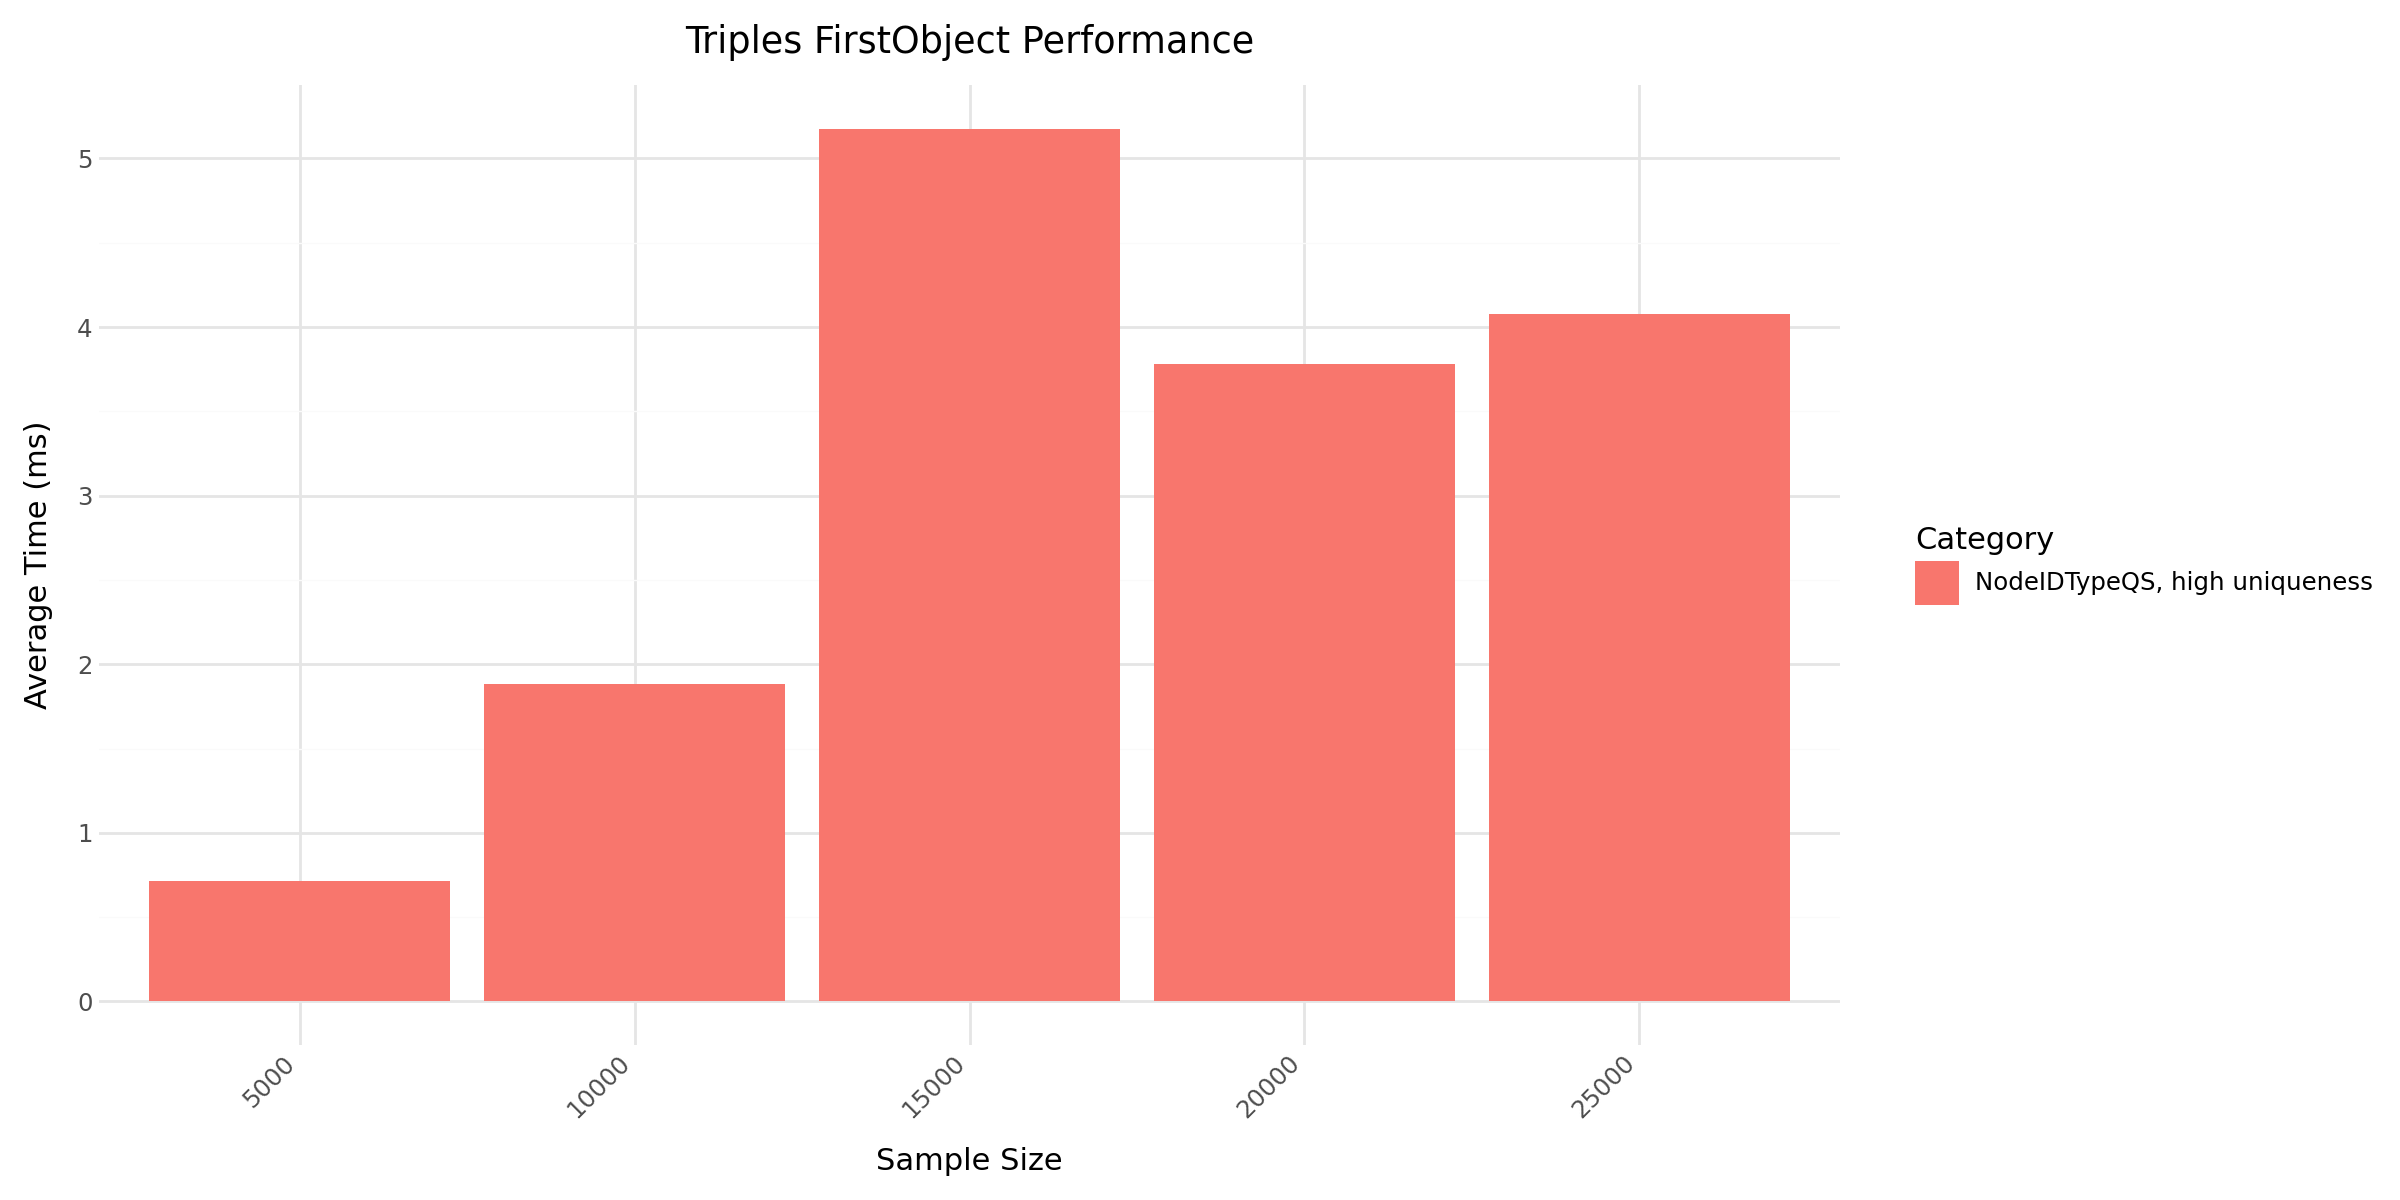

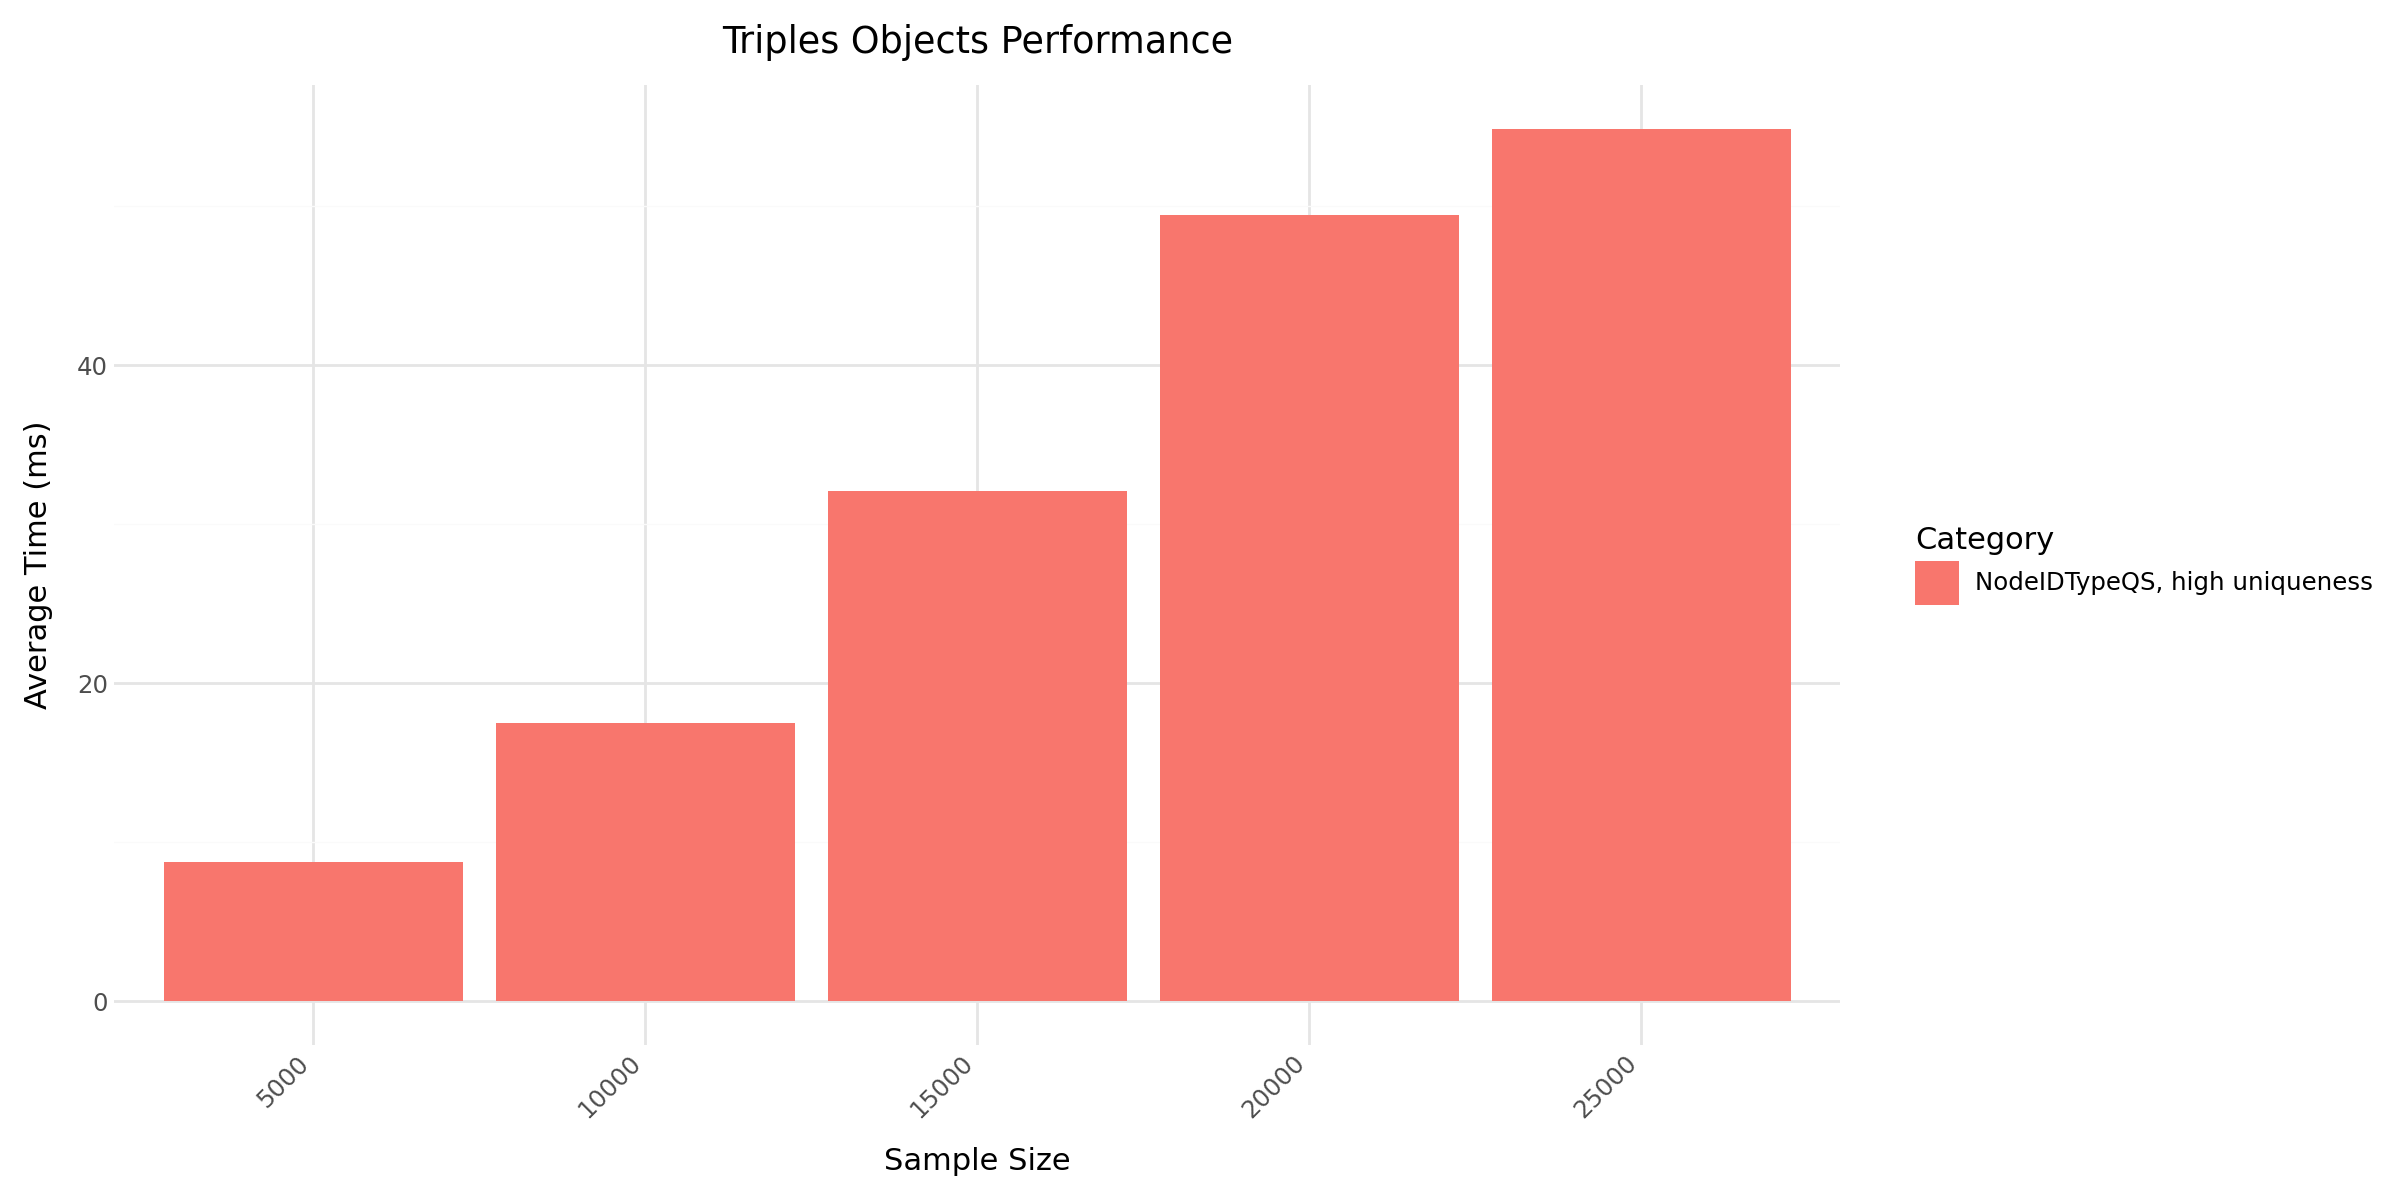

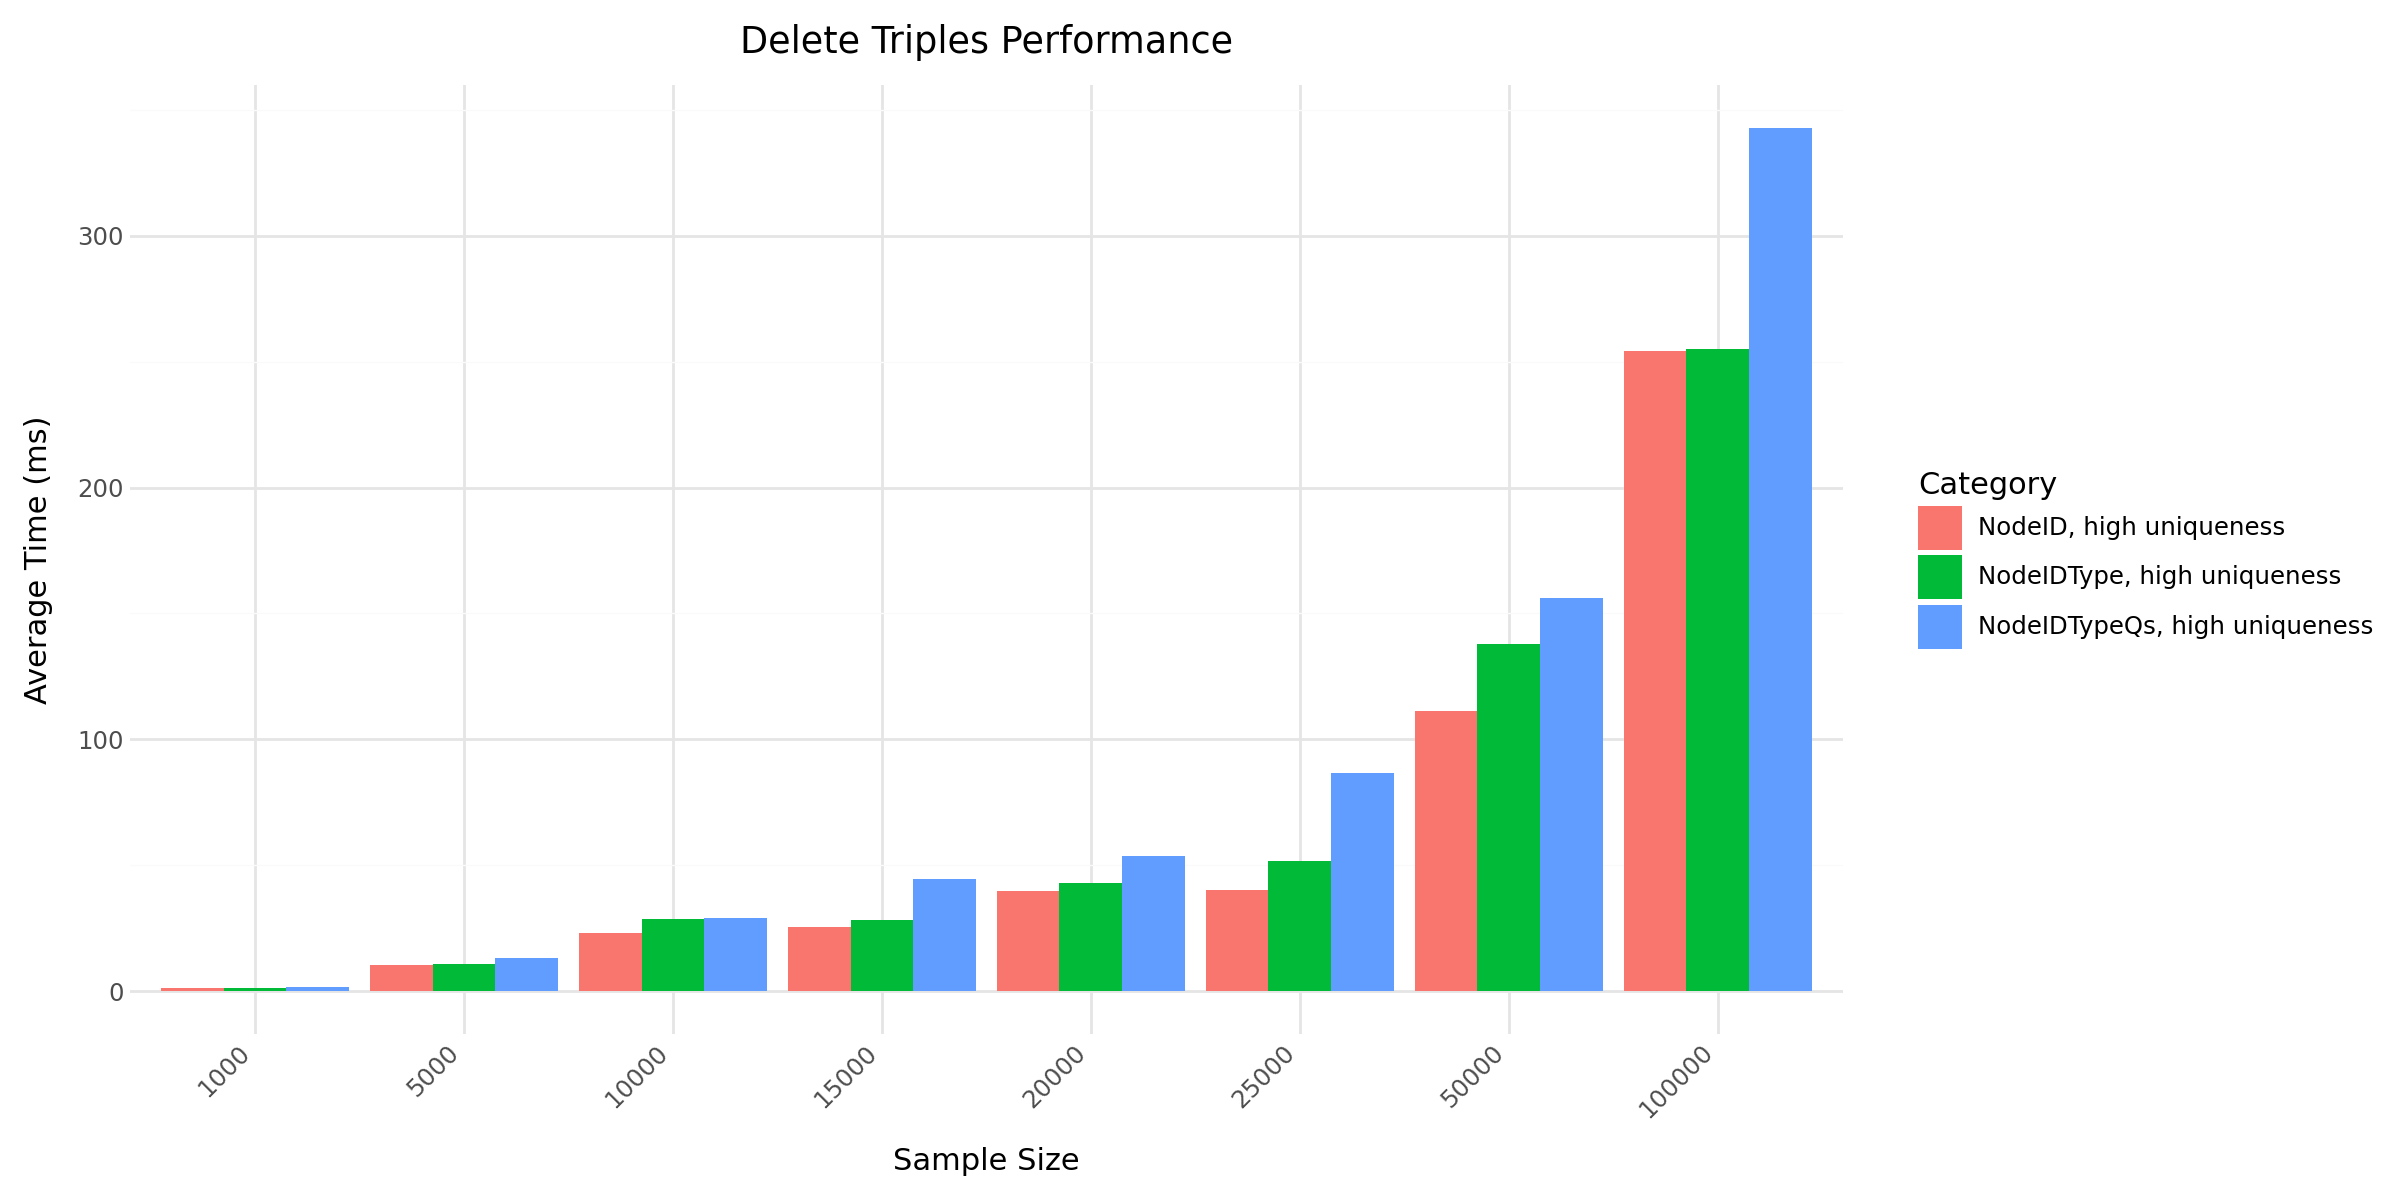

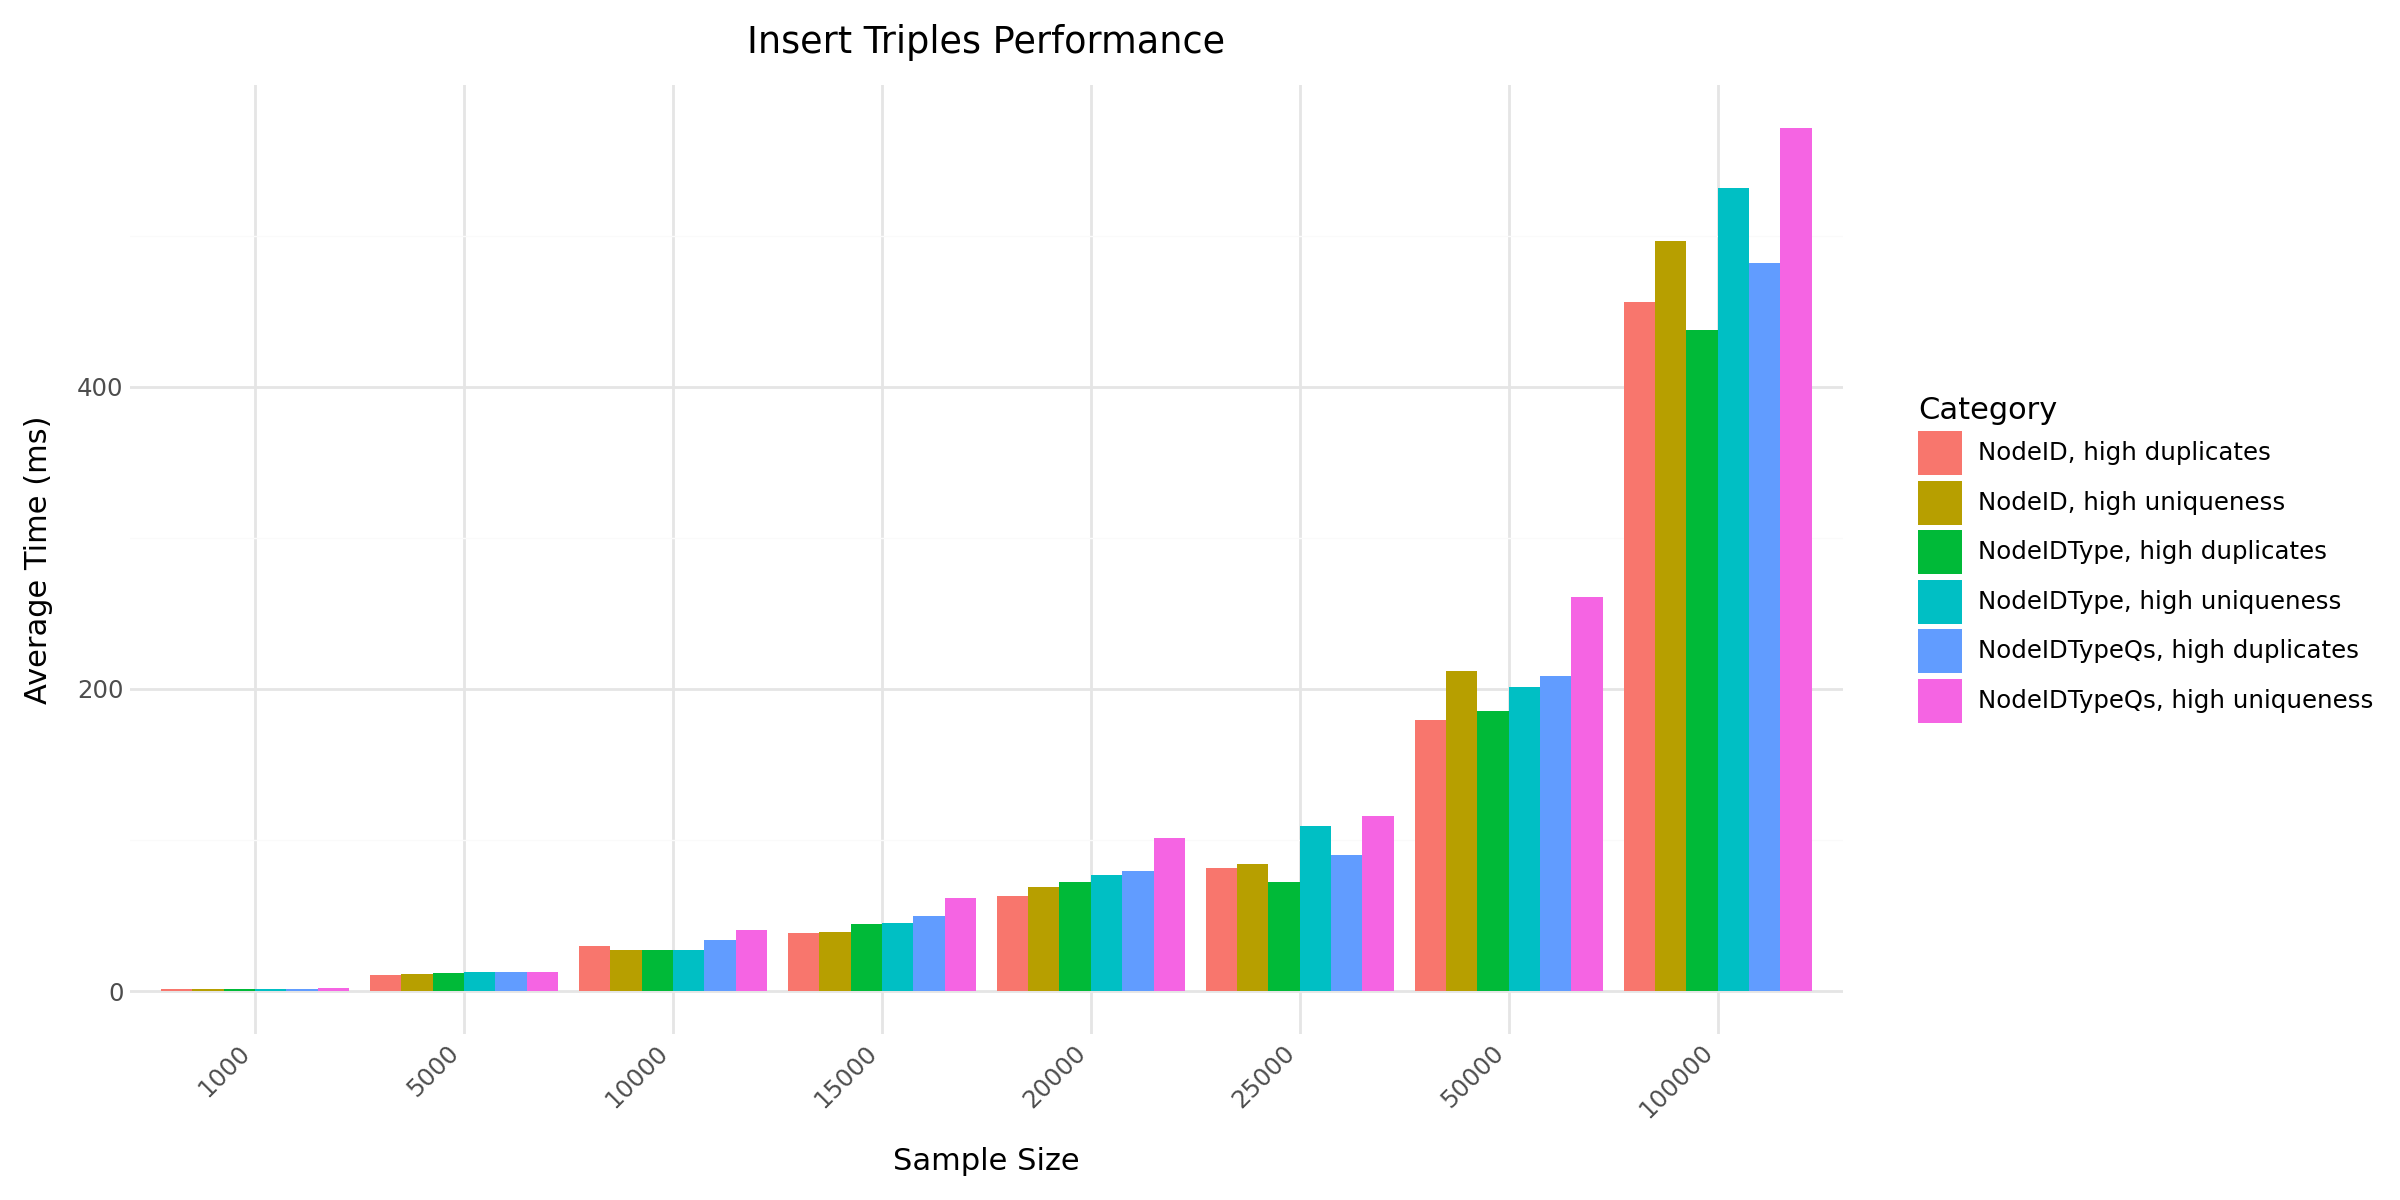

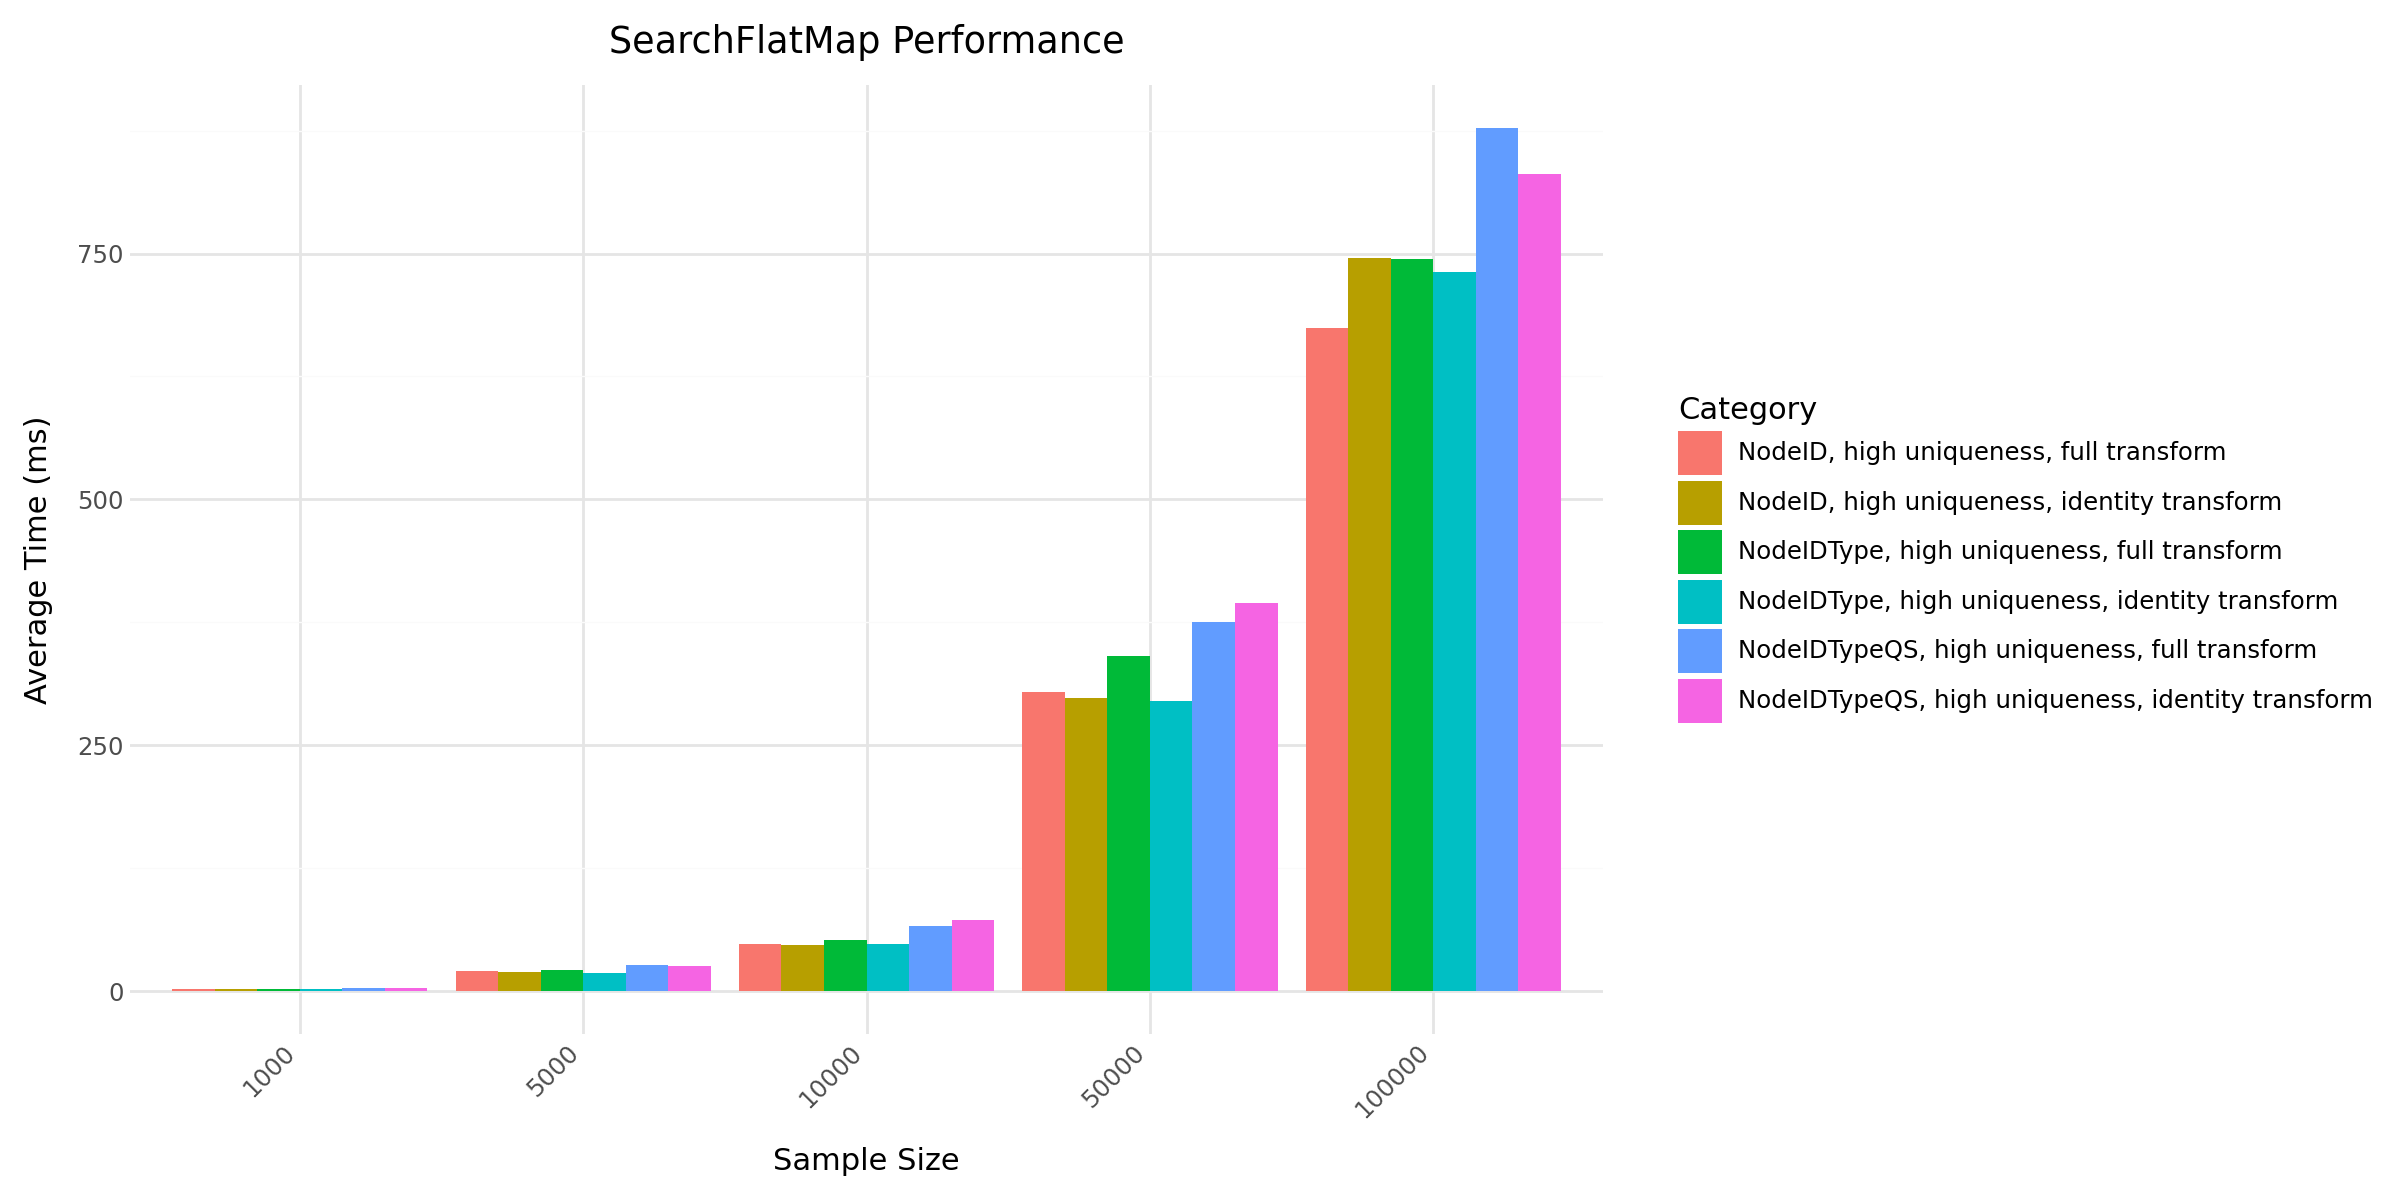

In [4]:
# Create bar plots for each experiment
experiments = recent_dfr['experiment'].unique()

for experiment in experiments:
    exp_data = recent_dfr[recent_dfr['experiment'] == experiment].copy()
    exp_data['avg_ms'] = exp_data['avg_ns'] / 1_000_000

    plot = (
        ggplot(exp_data, aes(x='factor(sampleSize)', y='avg_ms', fill='category'))
        + geom_bar(stat='identity', position='dodge')
        + labs(
            title=f'{experiment} Performance',
            x='Sample Size',
            y='Average Time (ms)',
            fill='Category'
        )
        + theme_minimal()
        + theme(
            axis_text_x=element_text(rotation=45, hjust=1),
            figure_size=(12, 6)
        )
    )

    display(plot)